In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Data Analysis

# Dataset Used :- https://www.kaggle.com/datasets/dragonheir/logistic-regression

In [2]:
data = pd.DataFrame(pd.read_csv('D:/Machine_Learning_Collection/Datasets/Social_Network_Ads.csv'))

In [3]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
x = data.iloc[: , 1:-1].values
y = data.iloc[: , -1:].values

# Data Preprocessing

In [6]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

In [7]:
x[: , 0] = label_encoder.fit_transform(x[: , 0])

x[: , -1:] = scaler.fit_transform(x[: , -1:])


# Model Training

In [8]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , shuffle = True)

In [9]:
model_estimator_50 = RandomForestClassifier(n_estimators = 50 , criterion = 'entropy')
model_estimator_100 = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy')

In [10]:
model_estimator_50.fit(x_train , y_train)
model_estimator_100.fit(x_train , y_train)

RandomForestClassifier(criterion='entropy')

# Testing

In [11]:
output_est_50 = model_estimator_50.predict(x_test)
output_est_100 = model_estimator_100.predict(x_test)

In [12]:
accuracy_est_50 = accuracy_score(output_est_50 , y_test)
accuracy_est_100 = accuracy_score(output_est_100 , y_test)

In [13]:
print(f"Accuracy est 50 : {accuracy_est_50}")
print(f"Accuracu est 100 : {accuracy_est_100}")

Accuracy est 50 : 0.925
Accuracu est 100 : 0.925


# Data Set is well processed and structured so estimators dont affect accuracy

# Estimators visualization

[Text(0.5146276595744681, 0.9583333333333334, 'x[1] <= 42.5\nentropy = 0.967\nsamples = 202\nvalue = [194, 126]'),
 Text(0.19680851063829788, 0.875, 'x[2] <= 0.639\nentropy = 0.703\nsamples = 138\nvalue = [174, 41]'),
 Text(0.07446808510638298, 0.7916666666666666, 'x[1] <= 36.5\nentropy = 0.312\nsamples = 116\nvalue = [168, 10]'),
 Text(0.05319148936170213, 0.7083333333333334, 'entropy = 0.0\nsamples = 76\nvalue = [114, 0]'),
 Text(0.09574468085106383, 0.7083333333333334, 'x[2] <= 0.022\nentropy = 0.625\nsamples = 40\nvalue = [54, 10]'),
 Text(0.07446808510638298, 0.625, 'entropy = 0.0\nsamples = 20\nvalue = [31, 0]'),
 Text(0.11702127659574468, 0.625, 'x[1] <= 37.5\nentropy = 0.885\nsamples = 20\nvalue = [23, 10]'),
 Text(0.0425531914893617, 0.5416666666666666, 'x[0] <= 0.5\nentropy = 0.98\nsamples = 5\nvalue = [7, 5]'),
 Text(0.02127659574468085, 0.4583333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 4]'),
 Text(0.06382978723404255, 0.4583333333333333, 'x[2] <= 0.242\nentropy =

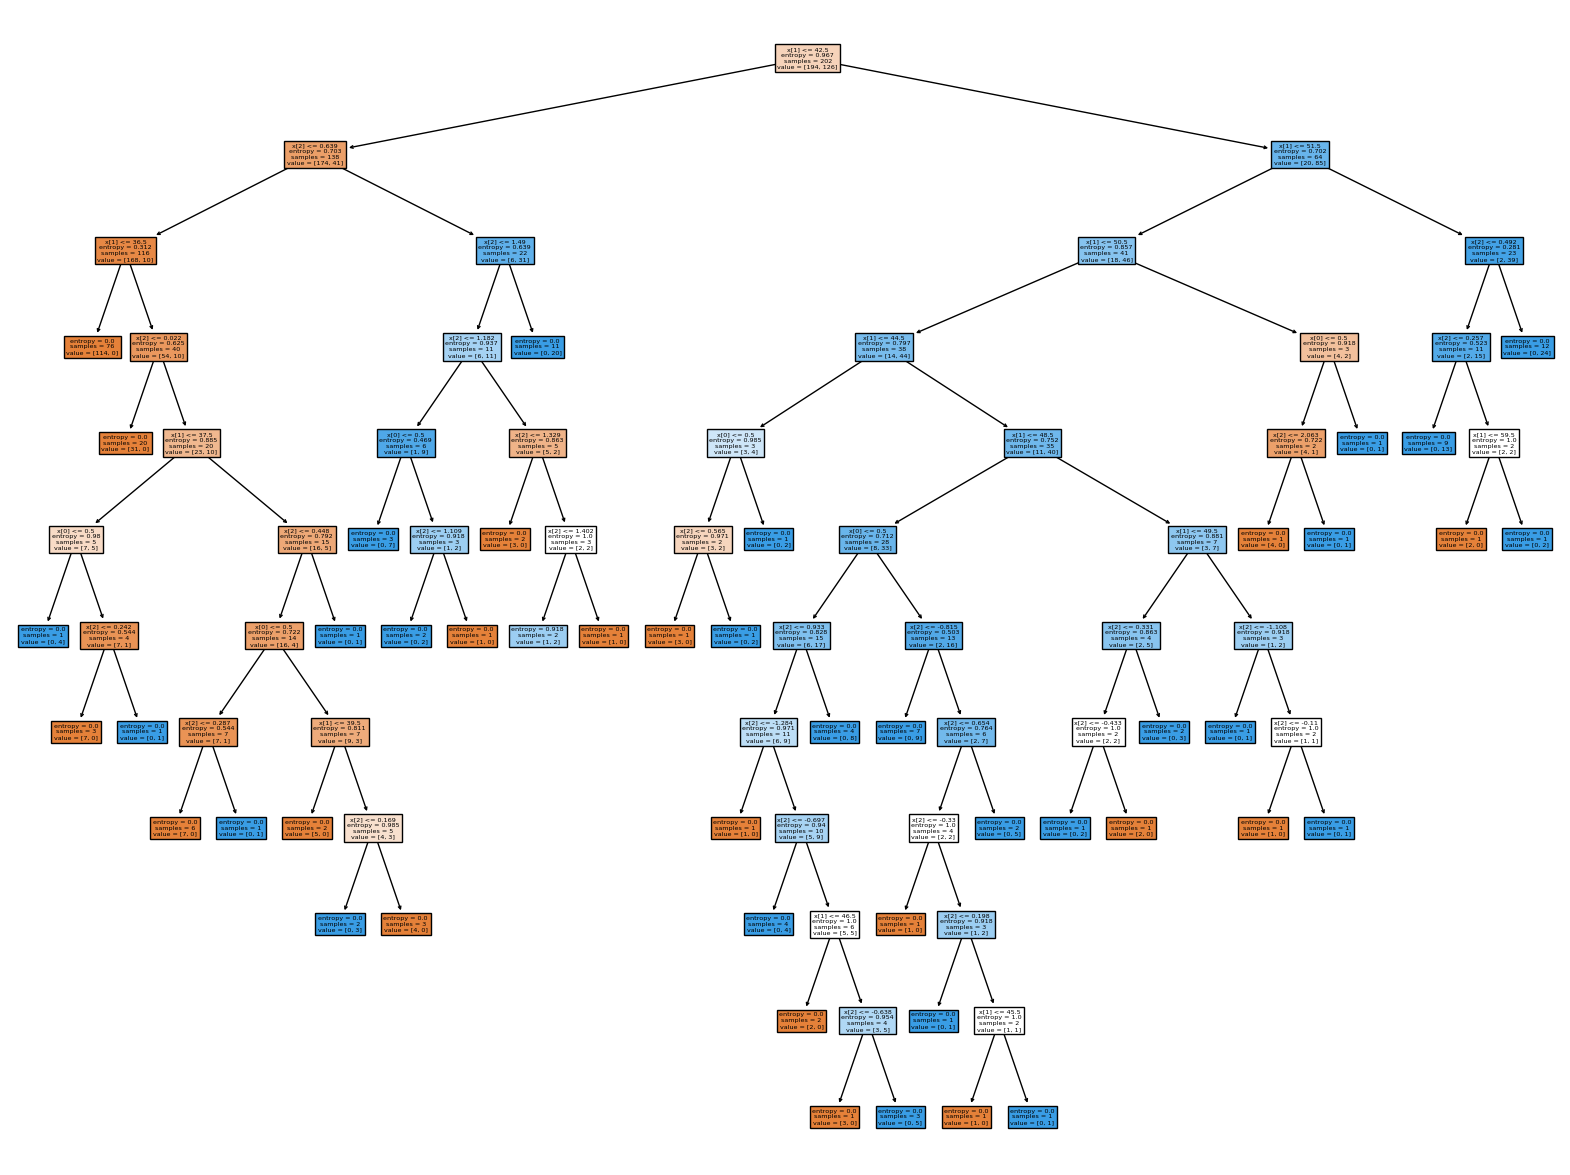

In [15]:
plt.figure(figsize=(20,15))
plot_tree(model_estimator_100.estimators_[0] , filled = True )